# JSC270 Class 1

## Exploratory Data Analysis use case

For this demonstration, we have used the OKCupid profiles public data set that can be downloaded at this address:
https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles.csv.zip

Note: for this notebook to work, you need to have the 'profiles.csv' data file in a 'data' directory. The following code allows you to download the dataset and put it in such directory (you need 'wget' to be installed on your computer for it to work. Alternately, download and unzip the file manually, and place it in a 'data' folder.

In [35]:
## Download snapshot of OkCupid data
## You will need 'wget' to be installed. Uncomment the following lines to upload the file:

#!wget https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles.csv.zip
#!unzip profiles.csv
#!mkdir data
#!mv profiles.csv data/

In [37]:
## Import of useful libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Let's start by loading the data onto a data frame:

In [5]:
df = pd.read_csv('data/profiles.csv')

We can then have a look at what the data attributes (or columns) in our dataset are:

In [6]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

We can get a sense of the content, by showing the details of the first 10 rows of our dataframe:

In [7]:
df.head

<bound method NDFrame.head of        age       body_type                 diet      drinks      drugs  \
0       22  a little extra    strictly anything    socially      never   
1       35         average         mostly other       often  sometimes   
2       38            thin             anything    socially        NaN   
3       23            thin           vegetarian    socially        NaN   
4       29        athletic                  NaN    socially      never   
5       29         average      mostly anything    socially        NaN   
6       32             fit    strictly anything    socially      never   
7       31         average      mostly anything    socially      never   
8       24             NaN    strictly anything    socially        NaN   
9       37        athletic      mostly anything  not at all      never   
10      35         average      mostly anything    socially        NaN   
11      28         average      mostly anything    socially      never   
12      

The following code also shows the first 10 rows.

In [8]:
df[0:10]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

**Question:** Explain why 'head' and '[0:10]' result in a visually different output.

<br>
Let's plot some of the data. We can look at the distribution of 'age':

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0a31b8d0>]],
      dtype=object)

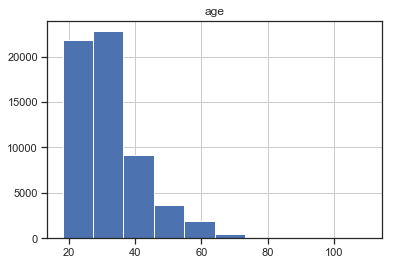

In [38]:
df.hist('age')

Our population tends to be younger. Yet, we can see that we have some older users (> 60).

The histogram is not very well detailed. Let's specify how the data should be binned. I want to see the details from 10 to 100 years old, and a bin size of 1 year:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x101dc8e48>]],
      dtype=object)

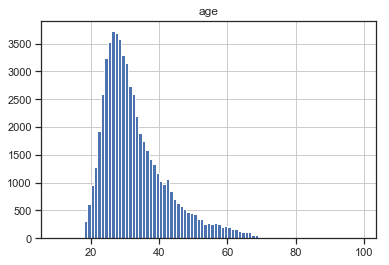

In [10]:
df.hist('age', bins=range(10, 100, 1))

Now I'm curious to see what are all of the different unique values in the 'age' column:

In [39]:
df.age.unique()

array([ 22,  35,  38,  23,  29,  32,  31,  24,  37,  28,  30,  39,  33,
        26,  27,  20,  25,  40,  36,  21,  34,  43,  46,  41,  42,  45,
        18,  55,  50,  59,  44,  48,  54,  51,  62,  52,  19,  58,  66,
        53,  63,  47,  49,  61,  60,  57,  56,  65,  64,  68, 110,  69,
        67, 109])

I can already spot some suspect values here, but it's not convenient in this form. How about we sort this list so it's easier to appreciate the numbers?

In [44]:
x = df.age.unique()      # store the unique values in a numpy array 'x'
x.sort()                 # sort the values in the numpy array
x                        # display the result

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
       109, 110])

There seems to be some interesting profiles here, where age is '109' and '110' respectively. Let's dig into those profile and filter our dataframe based on a condition. The pandas ['loc'](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) functions allows to access a group of rows and columns by label(s) or a boolean array.

In [45]:
df.loc[df['age'] == 110]    # select all rows where the age value is 110

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single


There is not much information in this profile (i.e. most fiels are blank). Would this be a dummy profile that someone created just to see what Ok Cupid asks? Let's look at the 109-year old profiles:

In [46]:
df.loc[df['age'] == 109]    # select all rows where the age value is 109

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,NaN,NaN,nothing,...,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


Here again, only one entry, and data that looks dubious... 109-years old, working on a masters program? and who might want kids? This in unplausible.

Now would be a good time for us to consider whether we want to discard these entries or keep them for further analysis. If we decide to discard these entries that we deem dubious, then it is essential to document clearly what are the criteria that are used to systematically drop some entries.

In this case, we could make a case-by-case rule: "We discarded two outliers (specifically age > 100) where subsequent analysis revealed that the profiles were unlikely to be real"

We also observed that one entry was a very incomplete profile. We could decide to apply an other rule, e.g. "We decided to drop all data entries where more than 80% of the fields are left, considered too incomplete for analysis purposes".

<br>
Let's calculate some very basic descriptive statistics. What about the mean age:

In [47]:
np.mean(df['age'])

32.3402895939679

What does the following piece of code allow me to claim?

In [48]:
np.percentile(df['age'], 95)

52.0

Answer: In this dataset, 95% of the population reported that they were under 52-years old.

Did anyone report they were a minor?
(note the careful usage of language: "did anyone report that they were a minor" vs. "is anyone a minor?". Why?) 

In [49]:
any(g < 18 for g in df['age'])    # does any row satisfy the condition age < 18?

False

In [50]:
# The following code is equivalent:

all(g >= 18 for g in df['age'])   # are all the rows satisfying the condition age >= 18?

True

Let's group our data by the 'sex' dimension, to get more insights on the population of interest:

In [51]:
females = df.loc[df['sex'] == 'f']        # create a dataframe with only the rows where sex is 'f'
males = df.loc[df['sex'] == 'm']          # create a dataframe with only the rows where sex is 'm'

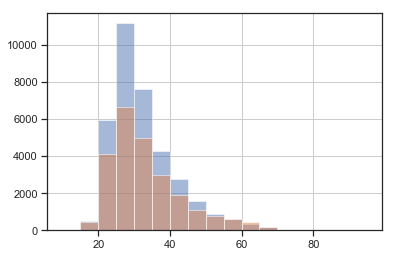

In [58]:
males['age'].hist(bins=range(10, 100, 5), alpha=0.5, label='M')        # plot the age distribution of males
females['age'].hist(bins=range(10, 100, 5), alpha=0.5, label='F')      # plot the age distribution of females

# Try out different values for alpha [0,1]. What happens? 

The following code (using seaborn) also allows to break the data down, using the 'hue' parameter (equivalent to 'group by'):

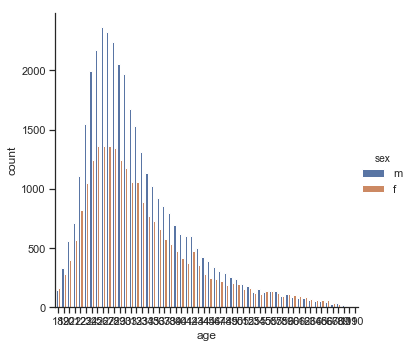

In [57]:
sns.catplot(x='age', kind='count', hue='sex', data=df)

# Try out changing the x axis about to 'y'. What happens?

There's a 'drugs' column. Let's look at what our population has to say about drugs:

In [29]:
df.drugs.unique()

array(['never', 'sometimes', nan, 'often'], dtype=object)

Q: What can we tell about the way the user was prompted to provide an answer?
A: the resulting data suggests that the user could pick one of the following values: never/sometimes/often, or not respon: nan. 

Q: What are the implications in terms of data quality and analysis?
A: (left as an exercise)

Since we don't have much categories that the user could pick from, we look at the distributions per answer, grouped by sex

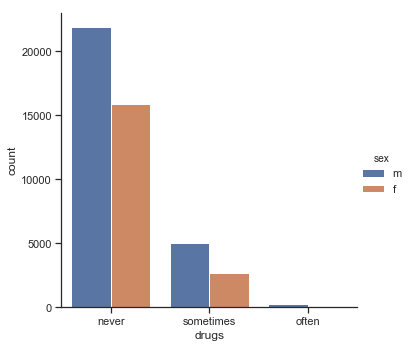

In [59]:
sns.catplot(x='drugs', kind='count', hue='sex', data=df)

Q: When being asked about their drug usage, do you think everyone is sincere when they respond? What are the implications in terms of data quality and subsequent analyses?
A: (left as an exercise)

<br>
When performing exploratory data analysis, it is important to be creative and play around with the data just out of curiosity, or to see what happens. For example, what if instead of grouping by sex in the above chart, we group by age? Notebooks are very convenient for replacing parameters in a cell and see what it results in:

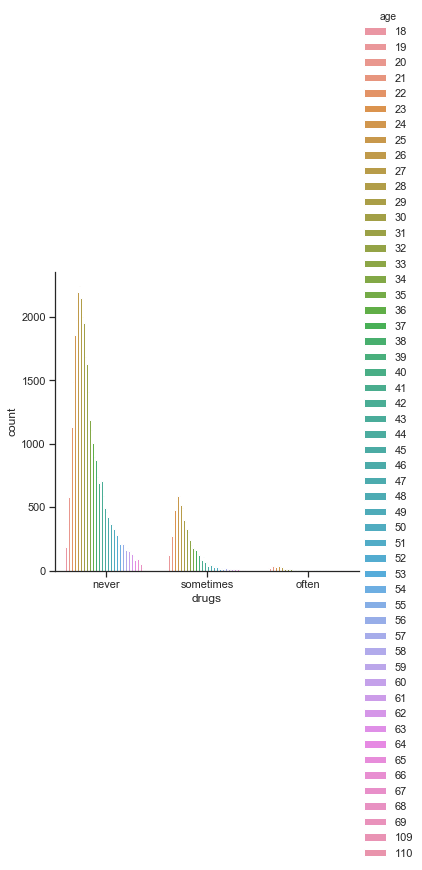

In [33]:
sns.catplot(x='drugs', kind='count', hue='age', data=df)

This is a bit of a silly chart, given the number of unique age values, yet it is not uninteresting. We can see here the break down of age distribution per answer to the question on drug usage. If only a more senior population would admit using drugs, we would be able to see this interesting fact in the graph above...

Bottom line is: notebooks allow to approach data analysis in a very organic and playful way. Most of the time, this will lead to unintersting clues, but in a few occasions, it may result in a very interesting fact that will lead to a whole new range of questions and hypotheses. Exploratory data analysis encourages quick plotting of a wide range of data views, in order to better appreciate the "texture" of the underlying data, spot anomalies (useful for data cleaning), spot outliers and interesting facts (to dig further), and form hypotheses to later be confirmed using statistical methods.